In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
import json

# Pre-process Grid data

In [2]:
Grid0121 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_011121.csv')
Grid0221 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_020121.csv')
Grid0321 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_030121.csv')
Grid0421 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_040121.csv')
Grid0521 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_050121.csv')
Grid0621 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_060121.csv')
Grid0721 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_070121.csv')
Grid0821 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_080121.csv')
Grid0921 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_090121.csv')
Grid1021 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_100121.csv')
Grid1121 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_110121.csv')
Grid1221 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_120121.csv')
Grid0122 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_010122.csv')
Grid0222 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_020122.csv')
Grid0322 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_030122.csv')

PV0121 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_011121.csv')
PV0221 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_020121.csv')
PV0321 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_030121.csv')
PV0421 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_040121.csv')
PV0521 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_050121.csv')
PV0621 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_060121.csv')
PV0721 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_070121.csv')
PV0821 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_080121.csv')
PV0921 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_090121.csv')
PV1021 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_100121.csv')
PV1121 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_110121.csv')
PV1221 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_120121.csv')
PV0122 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_010122.csv')
PV0222 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_020122.csv')
PV0322 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_030122.csv')

In [3]:
Grid_raw = pd.concat([Grid0121,Grid0221,Grid0321,Grid0421,Grid0521,Grid0621,Grid0721,Grid0821,Grid0921,Grid1021,Grid1121,Grid1221,Grid0122,Grid0222,Grid0322])
PV_raw = pd.concat([PV0121,PV0221,PV0321,PV0421,PV0521,PV0621,PV0721,PV0821,PV0921,PV1021,PV1121,PV1221,PV0122,PV0222,PV0322])

## Clean faulty data
### Deal with missing data/large time gap
Energy is calculated using Riemann sum ($E = P\cdot \Delta_{t}$). Therefore, it is important to determine the abnormally large time diff, a consequent of data being missed.

In [4]:
df1 = Grid_raw.reset_index(drop=True)
df1.sort_values(by=['Time'], inplace=True)
df1['time_diff'] = df1.diff()['Time']
df1

,No,Time,V1,V2,V3,I1,I2,I3,P1,P2,...,Q2,Q3,S1,S2,S3,PF1,PF2,PF3,F,time_diff
0,40000,1606893877,230.7,230.1,230.2,14.25,13.26,13.32,-2880.0,-2670.0,...,1380.0,1410.0,3480.0,3210.0,3240.0,-0.879,-0.879,-0.876,50.00,NaN
1,40001,1606893953,230.8,230.2,230.4,13.89,12.87,12.93,-2790.0,-2580.0,...,1380.0,1410.0,3180.0,2940.0,2970.0,-0.879,-0.879,-0.876,50.00,76.0
2,40002,1606894050,230.5,229.8,230.0,13.86,12.90,12.90,-2760.0,-2580.0,...,1410.0,1410.0,3180.0,2940.0,2970.0,-0.860,-0.861,-0.858,49.97,97.0
3,40003,1606894125,230.8,230.0,230.2,13.44,12.51,12.54,-2640.0,-2460.0,...,1410.0,1440.0,3180.0,2940.0,2970.0,-0.860,-0.861,-0.858,50.00,75.0
4,40004,1606894203,230.6,229.9,230.0,13.44,12.54,12.54,-2640.0,-2460.0,...,1410.0,1440.0,3090.0,2880.0,2880.0,-0.861,-0.861,-0.859,50.00,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339684,22657,1646096115,235.0,234.7,234.4,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000,1.000,1.000,50.03,77.0
339685,22658,1646096190,234.7,234.6,234.5,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000,1.000,1.000,50.00,75.0
339686,22659,1646096255,234.7,234.4,234.3,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000,1.000,1.000,50.03,65.0
339687,22660,1646096332,234.7,234.4,234.3,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000,1.000,1.000,50.04,77.0


<AxesSubplot:xlabel='Time'>

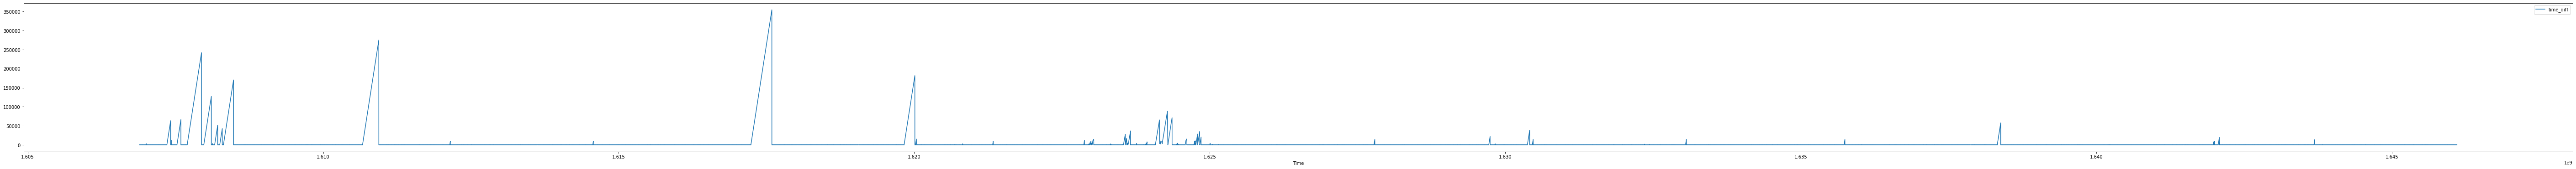

In [5]:
df1.plot(x='Time',y='time_diff',figsize=(100,6))

As being illustrated in the graph above, there were some gaps of over 50000 seconds (almost 14 hours) or even 350000 seconds (over 97 hours).

<AxesSubplot:xlabel='Time', ylabel='time_diff'>

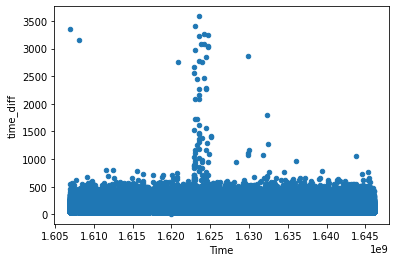

In [6]:
#df1['time_diff'].plot.kde(figsize=(200,6), bw_method=0.8)
df1.loc[df1.time_diff<3600].plot(x='Time',y='time_diff',kind='scatter')

In [7]:
len(df1.loc[df1.time_diff<1000])

339572

Most of values in time_diff column are smaller than 1000 seconds ($339572/33968=99,96\%$), so let consider time_diff < 1000 is normal. On the other hand, it takes a car a few hours to be fully charged. Hence, assuming the charging power does not change in at most 1000 seconds (about 17 minutes) will not cause too much error.

In [8]:
df2 = PV_raw.reset_index(drop=True)
df2.sort_values(by=['Time'], inplace=True)
df2['time_diff'] = df2.diff()['Time']
df2

,No,Time,V1,V2,V3,I1,I2,I3,P1,P2,...,Q2,Q3,S1,S2,S3,PF1,PF2,PF3,F,time_diff
0,40000,1606901773,228.6,228.1,228.6,1.02,1.02,1.05,180.0,150.0,...,-60.0,-30.0,210.0,210.0,240.0,0.758,0.725,0.754,50.00,NaN
1,40001,1606901937,229.3,228.6,229.1,1.02,1.02,1.08,180.0,180.0,...,-30.0,-30.0,210.0,210.0,240.0,0.767,0.759,0.767,50.00,164.0
2,40002,1606902047,229.3,228.6,229.1,1.05,1.05,1.11,180.0,180.0,...,-60.0,-60.0,240.0,240.0,240.0,0.767,0.759,0.767,50.00,110.0
3,40003,1606902212,229.3,228.6,229.1,0.99,1.02,1.05,150.0,150.0,...,-60.0,-30.0,210.0,210.0,240.0,0.724,0.714,0.742,50.00,165.0
4,40004,1606902310,229.3,228.6,229.1,1.02,0.99,1.05,150.0,150.0,...,-30.0,-30.0,210.0,210.0,240.0,0.716,0.702,0.722,50.00,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339736,22606,1646095785,234.8,234.5,234.6,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000,1.000,1.000,50.00,46.0
339737,22607,1646096006,234.9,234.6,234.6,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000,1.000,1.000,50.00,221.0
339738,22608,1646096103,234.9,234.7,234.7,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000,1.000,1.000,50.03,97.0
339739,22609,1646096311,234.6,234.4,234.4,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000,1.000,1.000,50.04,208.0


<AxesSubplot:xlabel='Time', ylabel='time_diff'>

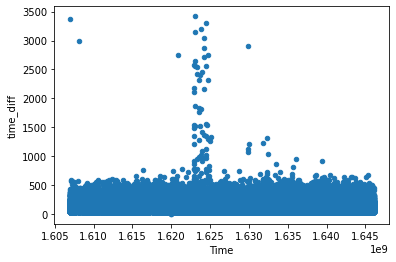

In [9]:
df2.loc[df2.time_diff<3600].plot(x='Time',y='time_diff',kind='scatter')

The same logic can also be applied for PV table.
# Calculate accumulated hourly Energy

In [10]:
def removeLargeDiff(diff_in):
    if (diff_in > 1000):
        return 0
    return diff_in

def extract_data(data_in):
    data_out = data_in.drop(['No', 'I1', 'I2', 'I3', 'V1', 'V2', 'V3', 'Q1', 'Q2', 'Q3', 'S1', 'S2', 'S3', 'PF1', 'PF2', 'PF3', 'F'], axis=1)
    data_out.sort_values(by=['Time'], inplace=True)
    data_out['Power'] = data_out['P1'] + data_out['P2'] + data_out['P3']
    
    data_out['Timediff'] = data_out.diff()['Time']
    data_out.loc[:,'Timediff'] = data_out.Timediff.shift(-1)
    data_out = data_out.iloc[:-1,:]
    data_out['Timediff'] = data_out.Timediff.map(removeLargeDiff)
    
    data_out['Energy'] = data_out['Power'] * data_out['Timediff']
    data_out.loc[:,'Time'] = pd.to_datetime(data_out.loc[:,'Time'],unit='s')
    df = data_out.set_index(['Time'])
    data = df[['Energy']].groupby(pd.Grouper(freq='1H')).sum()
    data['Energy_kWh'] = data['Energy'] / 3600000
    return data
    #return data_out.set_index(['Time'])

In [11]:
Grid_hourly = extract_data(Grid_raw)
PV_hourly = extract_data(PV_raw)

In [12]:
Grid_hourly

,Energy,Energy_kWh
Time,,
2020-12-02 07:00:00,-16564650.0,-4.601292
2020-12-02 08:00:00,-19928940.0,-5.535817
2020-12-02 09:00:00,-14473890.0,-4.020525
2020-12-02 10:00:00,-539820.0,-0.149950
2020-12-02 11:00:00,1556880.0,0.432467
...,...,...
2022-02-28 20:00:00,0.0,0.000000
2022-02-28 21:00:00,0.0,0.000000
2022-02-28 22:00:00,0.0,0.000000


In [13]:
PV_hourly

,Energy,Energy_kWh
Time,,
2020-12-02 09:00:00,698550.0,0.194042
2020-12-02 10:00:00,1478430.0,0.410675
2020-12-02 11:00:00,1513860.0,0.420517
2020-12-02 12:00:00,1059300.0,0.294250
2020-12-02 13:00:00,652350.0,0.181208
...,...,...
2022-02-28 20:00:00,0.0,0.000000
2022-02-28 21:00:00,0.0,0.000000
2022-02-28 22:00:00,0.0,0.000000


<AxesSubplot:xlabel='Time'>

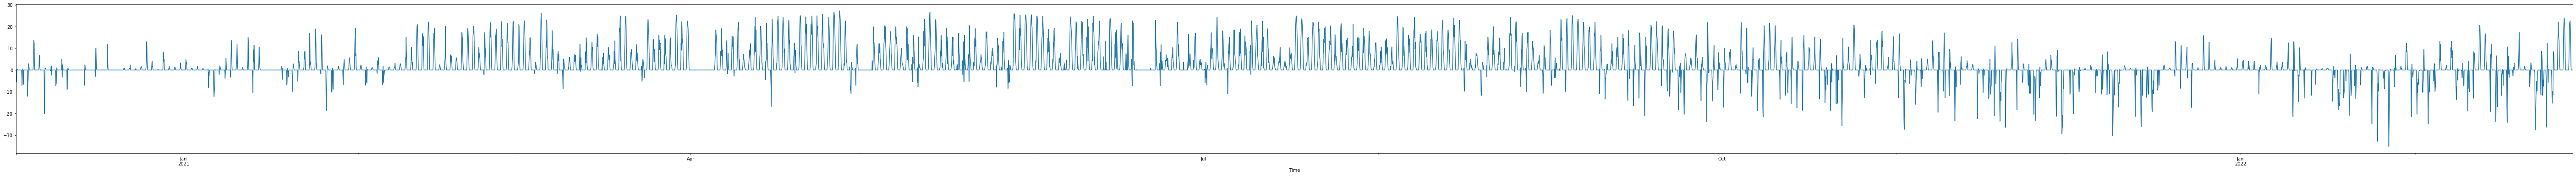

In [14]:
Grid_hourly['Energy_kWh'].plot(figsize=(100,6))

<AxesSubplot:xlabel='Time'>

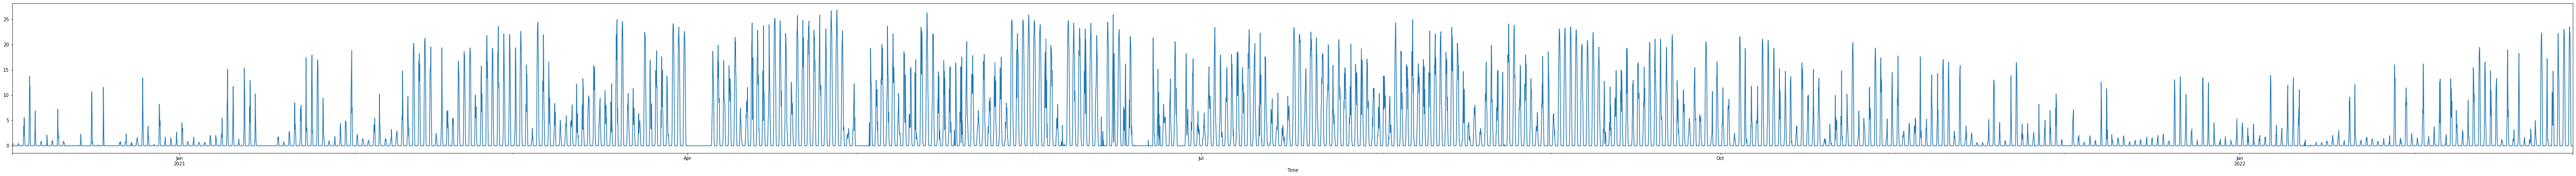

In [15]:
PV_hourly['Energy_kWh'].plot(figsize=(100,6))

## Calculate hourly EV charging data
The chargers prioritise solar energy over electricity form the grid. In case the solar energy is redundant, it will flow to the grid.

The energy consumption of chargers is determined by $E_{charge} = E_{solar} - E_{grid}$, in which $E_{grid}$ holds positive value when the solar energy is discharged to the grid and is negative otherwise.

In [16]:
Charge_hourly = PV_hourly[['Energy_kWh']].copy()
Charge_hourly['Energy_kWh'] = PV_hourly['Energy_kWh'] - Grid_hourly.iloc[2:]['Energy_kWh']

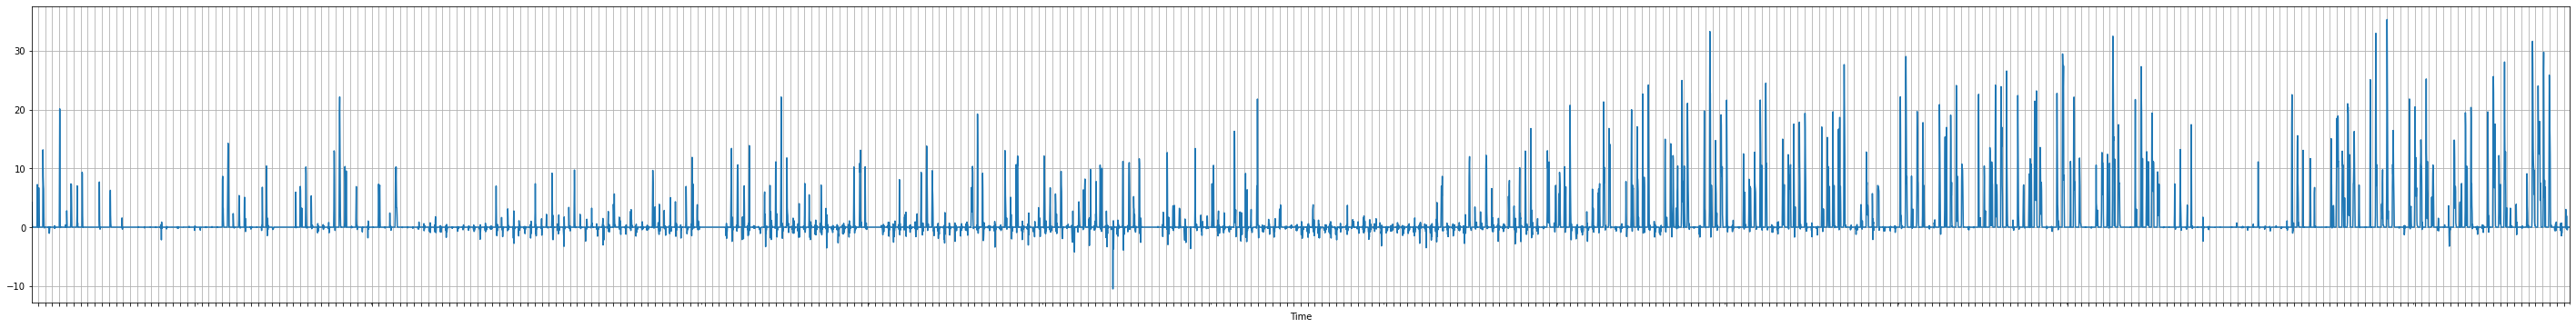

In [17]:
fig = Charge_hourly['Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

In [18]:
Charge_hourly

,Energy_kWh
Time,
2020-12-02 09:00:00,4.214567
2020-12-02 10:00:00,0.560625
2020-12-02 11:00:00,-0.011950
2020-12-02 12:00:00,-0.005675
2020-12-02 13:00:00,0.000558
...,...
2022-02-28 20:00:00,0.000000
2022-02-28 21:00:00,0.000000
2022-02-28 22:00:00,0.000000


## Extract information from column 'Time'
The charging demand is strongly linked with work schedules of HAN's staffs. The schedule is represented by 3 componenets: day of week, hour of day, and holiday. THe index is GMT time to avoid duplicated index, but column day and hour are in local time.

In [19]:
import pytz
netherlands = pytz.timezone('Europe/Amsterdam')

In [20]:
Charge_hourly['weekday']=Charge_hourly.index.tz_localize('GMT').tz_convert(netherlands).day_of_week
Charge_hourly['hour']=Charge_hourly.index.tz_localize('GMT').tz_convert(netherlands).hour

In [21]:
import holidays
Charge_hourly['hols'] = pd.Series(Charge_hourly.index).apply(lambda x: holidays.CountryHoliday('NL').get(x)).values

In [22]:
Charge_hourly['hols'].unique()

array([None, 'Eerste Kerstdag', 'Tweede Kerstdag', 'Nieuwjaarsdag',
       'Goede Vrijdag', 'Eerste paasdag', 'Tweede paasdag', 'Koningsdag',
       'Hemelvaart', 'Eerste Pinksterdag', 'Tweede Pinksterdag'],
      dtype=object)

In addition to national holidays, school breaks are also taken in account.

In [23]:
# Add HAN breaks
# https://www.hanuniversity.com/en/study-and-living/studying-at-han/academic-calendar/#
# https://schoolholidayseurope.eu/school-holidays-holland/
Charge_hourly.loc[(Charge_hourly.index > '2021-02-14 23:00:00') & (Charge_hourly.index < '2021-02-22 00:00:00'), 'hols'] = 'Spring holiday'
Charge_hourly.loc[(Charge_hourly.index > '2021-05-02 23:00:00') & (Charge_hourly.index < '2021-05-10 00:00:00'), 'hols'] = 'May holiday'
Charge_hourly.loc[(Charge_hourly.index > '2021-07-11 23:00:00') & (Charge_hourly.index < '2021-08-16 00:00:00'), 'hols'] = 'Summer break'
Charge_hourly.loc[(Charge_hourly.index > '2021-10-24 23:00:00') & (Charge_hourly.index < '2021-11-01 00:00:00'), 'hols'] = 'Fall holiday'
Charge_hourly.loc[(Charge_hourly.index > '2020-12-20 23:00:00') & (Charge_hourly.index < '2021-01-04 00:00:00'), 'hols'] = 'Winter break'
Charge_hourly.loc[(Charge_hourly.index > '2021-12-23 23:00:00') & (Charge_hourly.index < '2022-01-10 00:00:00'), 'hols'] = 'Winter break'
Charge_hourly.loc[(Charge_hourly.index > '2022-02-27 23:00:00') & (Charge_hourly.index < '2022-03-07 00:00:00'), 'hols'] = 'Spring holiday'

In [24]:
Charge_hourly

,Energy_kWh,weekday,hour,hols
Time,,,,
2020-12-02 09:00:00,4.214567,2,10,None
2020-12-02 10:00:00,0.560625,2,11,None
2020-12-02 11:00:00,-0.011950,2,12,None
2020-12-02 12:00:00,-0.005675,2,13,None
2020-12-02 13:00:00,0.000558,2,14,None
...,...,...,...,...
2022-02-28 20:00:00,0.000000,0,21,Spring holiday
2022-02-28 21:00:00,0.000000,0,22,Spring holiday
2022-02-28 22:00:00,0.000000,0,23,Spring holiday


In [25]:
Charge_hourly

,Energy_kWh,weekday,hour,hols
Time,,,,
2020-12-02 09:00:00,4.214567,2,10,None
2020-12-02 10:00:00,0.560625,2,11,None
2020-12-02 11:00:00,-0.011950,2,12,None
2020-12-02 12:00:00,-0.005675,2,13,None
2020-12-02 13:00:00,0.000558,2,14,None
...,...,...,...,...
2022-02-28 20:00:00,0.000000,0,21,Spring holiday
2022-02-28 21:00:00,0.000000,0,22,Spring holiday
2022-02-28 22:00:00,0.000000,0,23,Spring holiday


In [26]:
Charge_hourly.to_csv('./charge_hourly.csv')

# A quick analysis of data

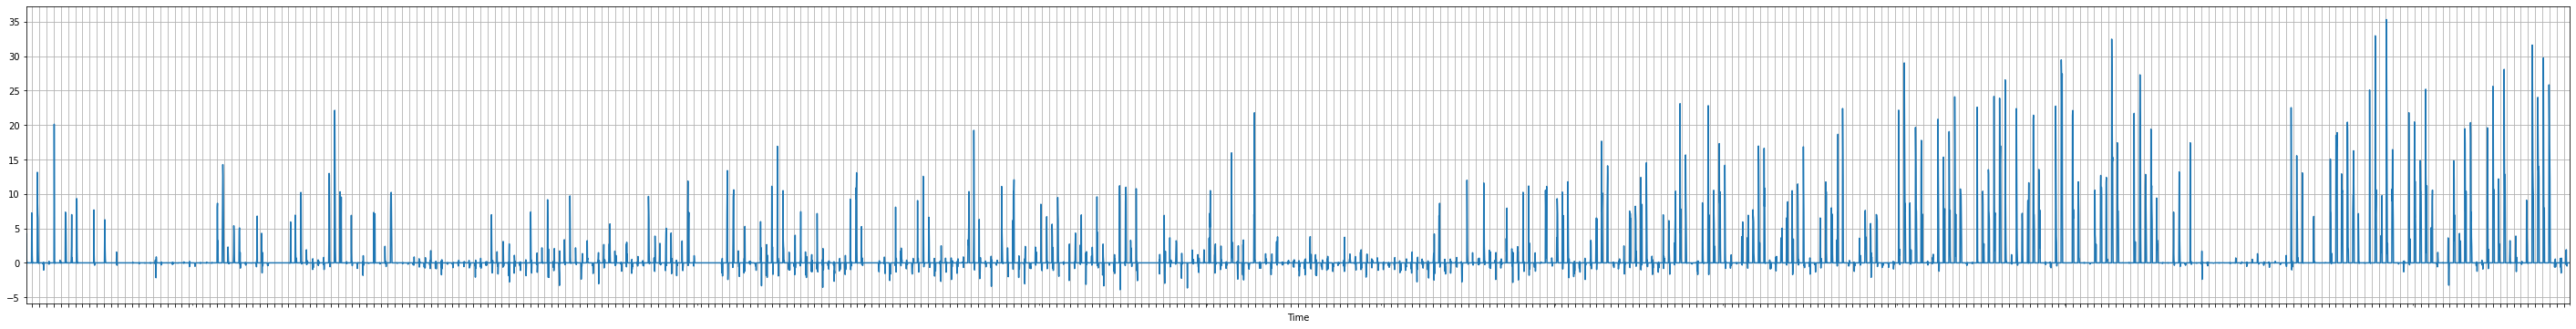

In [29]:
focus = Charge_hourly
focus['Energy_kWh'] = np.where((Charge_hourly.index.hour > 7) & (Charge_hourly.index.hour<14), Charge_hourly['Energy_kWh'], 0)
fig = focus['Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

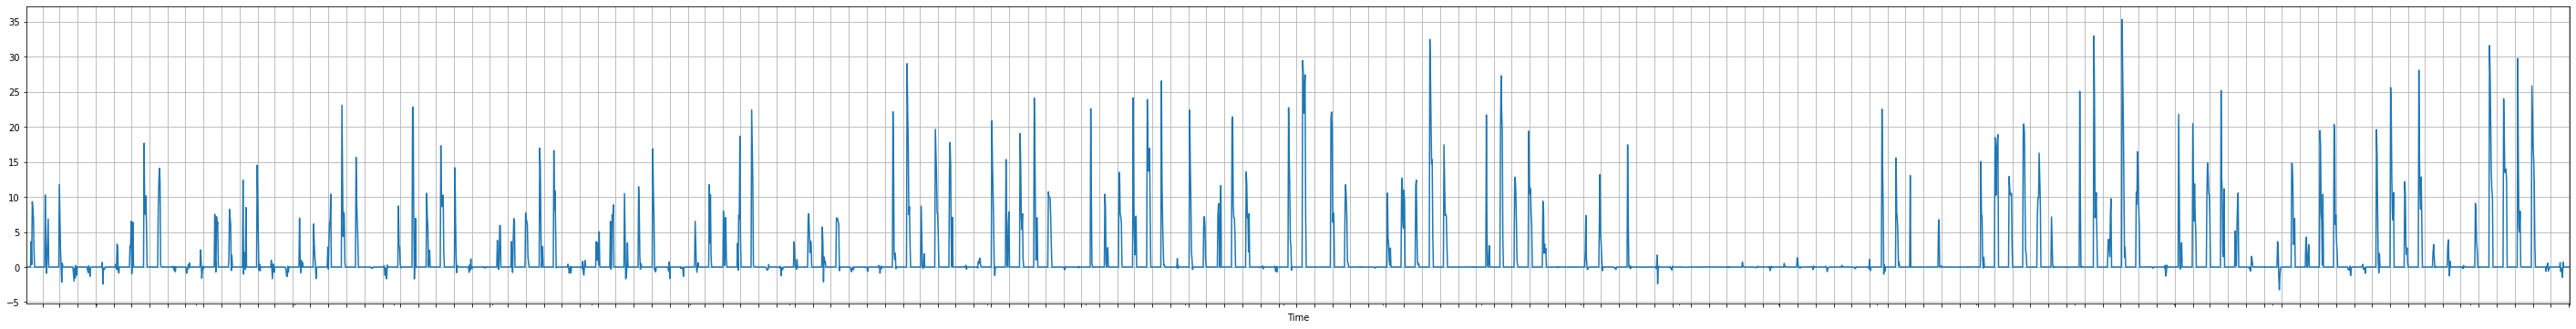

In [30]:
fig = focus.loc['2021-09-01 00:00:00':'2022-02-28 00:00:00','Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

The total charging demand is highest on Tuesday and Thursday, while the demand on a day is highest in early morning.

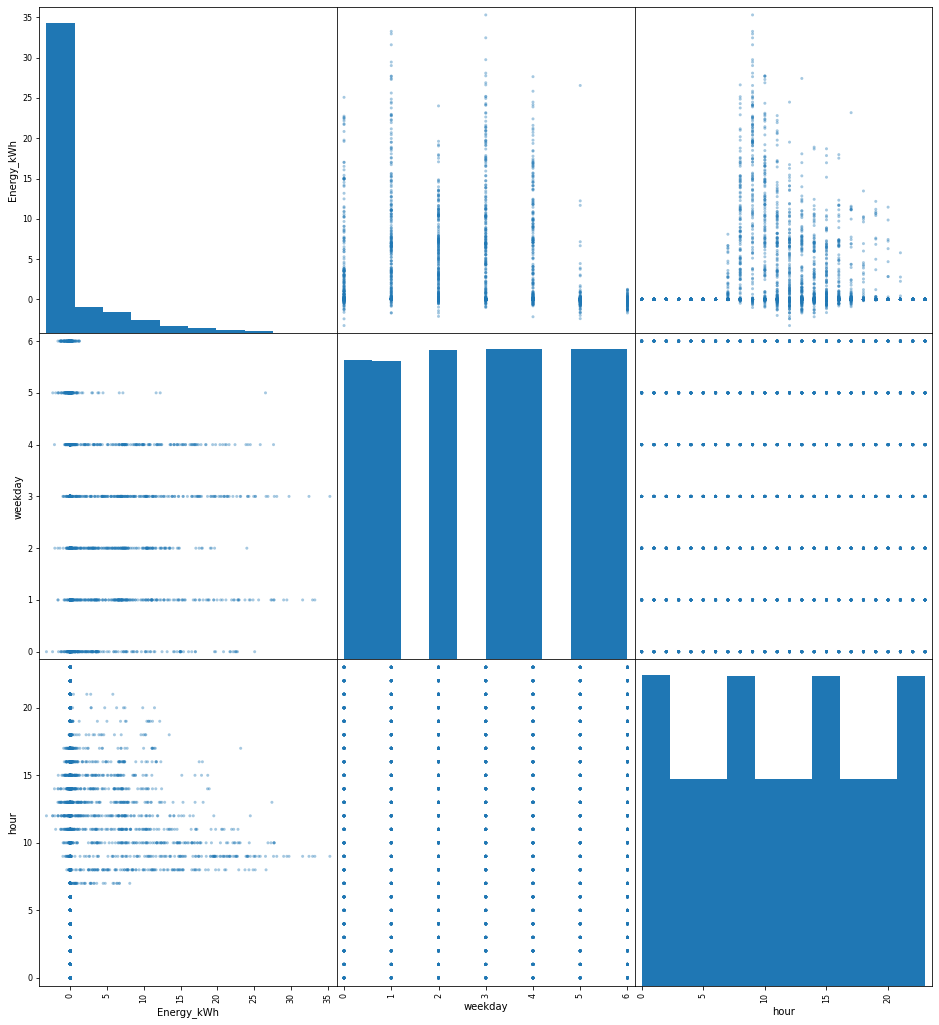

In [28]:
from pandas.plotting import scatter_matrix 
focus = Charge_hourly
scatter_matrix(focus.loc['2021-09-01 00:00:00':'2022-02-28 00:00:00',:], figsize=(16,18), alpha=0.4) 
plt.pyplot.show()

It can be seen that in normal condition, the charging demand is highest between 8 a.m and 12 a.m